### Treść zadania

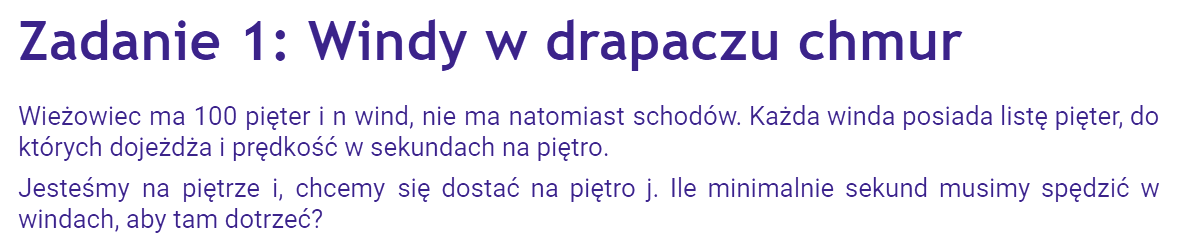

### Omówienie algorytmu

Najtrudniejszą częścią zadania jest dobre przygotowanie sobie grafu. Ponieważ na wejściu otrzymujemy dla każdej z wind listę pięter, które ona łączy tzn. da się dotrzeć daną windą w dwie strony między każdą parą pięter z tej listy, a także dostajemy prędkość windy, możemy utworzyć sobie graf nieskierowany, w którym wierzchołkami będą piętra, a ważonymi krawędziami czasy przejazdu między piętrami (nie ważne którą z wind). Tworzenie połączeń pomiędzy każdą parą pięter, jakie łączy dana winda, nie ma najmniejszego sensu, ponieważ winda jeździ ruchem jednostajnym, więc jeżeli da się np. przejechać z piętra $ 1. $ na $ 4. $, a następnie z $ 4. $ na $ 10 $, niepotrzebna jest nam informacja (krawędź), która bezpośrednio pokazuje, że da się dotrzeć z piętra $ 0 $ na $ 10 $ (bo i tak musimy przejechać przez piętro $ 4 $, a to w żaden sposób nam nie zmienia czasu). Zatem ograniczamy się do stworzenia krawędzi pomiędzy parami najbliższych pięter, do których dociera winda (musimy więc tę listę pięter uprzednio posortować - w czasie stałym $ O(100 \cdot log(100)) = O(1) $. Kolejnym krokiem jest już tylko odpalenie algorytmu Dijkstry między piętrem początkowym a końcowym. (Jeżeli byśmy stworzyli jednak krawędzie do wszystkich możliwych par pięter, jakie odwiedza winda, otrzymalibyśmy tę samą złożoność, ale inną stałą: $ 1 + 2 + 3 + ... + (99 - 1) = \frac{1 + (99 - 1)}{2} \cdot 100 = \frac{99^2}{2} \approx 4900 $ zamiast $ 99 $).

### Złożoność

Złożoność wynika stąd, że mamy jawnie daną liczbę pięter, które traktujemy jako wierzchołki. Z tego powodu mamy dokładnie $ 100 $ wierzchołków, ale mogą się zdarzać krawędzie wielokrotne. W najgorszym przypadku dana winda może łączyć każde piętro z każdym, więc wtedy będzie $ 100 - 1 = 99 $ połączeń dla jednej windy, ale ponieważ mamy $ n $ wind, łącznie możemy mieć $ O(99 \cdot(n)) = O(n) $ krawędzi. Zatem graf utworzymy w czasie $ O(V + E) = O(100 + 99n) = O(n) $, a algorytm Dijkstry zadziała w czasie $ O(E \cdot log(V)) = O(99n \cdot log(100)) = O(n) $
###### Obliczeniowa:
$ O(n) $
###### Pamięciowa:
$ O(n) $

### Implementacja #1
##### Z użyciem wbudowanego sortowania

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    pq = PriorityQueue()
    pq.put((0, s))

    while not pq.empty():
        min_w, u = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            # Break a loop if we found a shortest path to the specified
            # target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                pq.put((weights[u] + weight, v))
                
    return weights


def create_graph(elevators):
    # Find a number of floors
    n = 0
    for e in elevators:
        n = max(e[0])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in elevators:
        e[0].sort()
        for i in range(1, len(e[0])):
            G[e[0][i]].append((e[0][i - 1], (e[0][i] - e[0][i - 1]) * e[1]))
            G[e[0][i - 1]].append((e[0][i], (e[0][i] - e[0][i - 1]) * e[1]))
    return G


def min_time_in_elevators(elevators: 'array of tuples (floors connected, elevator speed)', 
                          s: 'source', t: 'target'):
    G = create_graph(elevators)
    print(*G, sep='\n')
    # Run the Dijkstra's algorithm to find the minimum time
    return dijkstra(G, s, t)[t]

###### Kilka testów

In [2]:
elevators = [([1, 2, 5], 1), ([0, 3, 5], 2), ([0, 3], 2), ([1, 2, 4], 3), ([3, 5], 1), ([0, 1, 2, 3, 4, 5], 5)]

print(min_time_in_elevators(elevators, 0, 5))
print(min_time_in_elevators(elevators, 0, 4))
print(min_time_in_elevators(elevators, 5, 0))

[(3, 6), (3, 6), (1, 5)]
[(2, 1), (2, 3), (0, 5), (2, 5)]
[(1, 1), (5, 3), (1, 3), (4, 6), (1, 5), (3, 5)]
[(0, 6), (5, 4), (0, 6), (5, 2), (2, 5), (4, 5)]
[(2, 6), (3, 5), (5, 5)]
[(2, 3), (3, 4), (3, 2), (4, 5)]
8
[(3, 6), (3, 6), (1, 5)]
[(2, 1), (2, 3), (0, 5), (2, 5)]
[(1, 1), (5, 3), (1, 3), (4, 6), (1, 5), (3, 5)]
[(0, 6), (5, 4), (0, 6), (5, 2), (2, 5), (4, 5)]
[(2, 6), (3, 5), (5, 5)]
[(2, 3), (3, 4), (3, 2), (4, 5)]
11
[(3, 6), (3, 6), (1, 5)]
[(2, 1), (2, 3), (0, 5), (2, 5)]
[(1, 1), (5, 3), (1, 3), (4, 6), (1, 5), (3, 5)]
[(0, 6), (5, 4), (0, 6), (5, 2), (2, 5), (4, 5)]
[(2, 6), (3, 5), (5, 5)]
[(2, 3), (3, 4), (3, 2), (4, 5)]
8


### (Dodatkowo) Wyznaczanie kolejno wybieranych wind

###### UWAGA
W poniższej implementacji zastosowałem taki trick, który możemy użyć w grafach nieskierowanych, polagający na tym, że szukając ścieżek z wierzchołka $ s $ do $ t $, przekazujemy na odwrót wierzchołki, tzn. $ s $ (startowy) jako $ t $ (końcowy) oraz $ t $ (końcowy) jako $ s $ początkowy. Wówczas, podczas odtwarzania ściezki, nie musimy odwracać już kolejności wierzchołków, jakie będą leżały na wyznaczonej ścieżce, ponieważ mamy zapisanych rodziców w odwrotnej kolejności.

In [3]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty():
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            # Break a loop if we found a shortest path to the specified
            # target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                pq.put((weights[u] + weight, v, u))
                
    return weights, parents


def create_graph(elevators):
    # Find a number of floors
    n = 0
    for e in elevators:
        n = max(e[0])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in elevators:
        e[0].sort()
        for i in range(1, len(e[0])):
            G[e[0][i]].append((e[0][i - 1], (e[0][i] - e[0][i - 1]) * e[1]))
            G[e[0][i - 1]].append((e[0][i], (e[0][i] - e[0][i - 1]) * e[1]))
    return G


def get_shortest_path(parents, s: 'source'):
    path = []
    
    while s is not None:
        path.append(s)
        s = parents[s]
        
    return path


def min_time_elevators_path(elevators: 'array of tuples (floors connected, elevator speed)', 
                            s: 'source', t: 'target'):
    G = create_graph(elevators)
    # Run the Dijkstra's algorithm to find the minimum time
    weights, parents = dijkstra(G, t, s)
    return weights[s], get_shortest_path(parents, s)

###### Kilka testów

In [4]:
elevators = [([1, 2, 5], 1), ([0, 3, 5], 2), ([0, 3], 2), ([1, 2, 4], 3), ([3, 5], 1), ([0, 1, 2, 3, 4, 5], 5)]

print(min_time_elevators_path(elevators, 0, 5))
print(min_time_elevators_path(elevators, 0, 4))
print(min_time_elevators_path(elevators, 5, 0))
print(min_time_elevators_path(elevators, 2, 1))

(8, [0, 3, 5])
(11, [0, 3, 4])
(8, [5, 3, 0])
(1, [2, 1])


### Implementacja #2
##### Z użyciem Counting Sorta

To zadanie idealnie nadaje się do skorzystania z najprostrzego algorytmu sortującego w czasie liniowym, czyli Counting Sorta. Co prawda nie wpłynie nam to na złożoność, a w Pythonie dodatkowo pogorszy wydajność, bo wbudowane sortowanie będzie zawsze szybsze od zaimplementowanego przez nas sortowania, w innych językach (np. C) moglibyśmy zaobserwować wzrost szybkości działania algorytmu, ponieważ czas potrzebny na przesortowanie jednej listy łączonych przez windę pięter (dokładniej to mam na myśli wartość stałej w złożoności obliczeniowej), który maksymalnie wynosi teraz $ 100 \cdot log(100) = 1000 $ (przy założeniu, że $ log $ jest logarytmem dwójkowym), spadłby do $ 100 $ (przy sortowaniu liniowym).

In [5]:
from queue import PriorityQueue


def counting_sort(arr, k: 'the upper bound of the values range'):
    # Allocate memory for required temporary arrays
    counts = [0] * (k + 1)
    temp = [None] * len(arr)
    # Count values repetitions
    for val in arr:
        counts[val] += 1
    # Modify the counts array to indicate how many values are not greater than the current one
    for i in range(1, len(counts)):
        counts[i] += counts[i-1]
    # Rewrite values to the temp sorted array
    for i in range(len(arr)-1, -1, -1):
        counts[arr[i]] -= 1
        temp[counts[arr[i]]] = arr[i]
    # Rewrite sorted values to the initial array
    for i in range(len(temp)):
        arr[i] = temp[i]


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty():
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            # Break a loop if we found a shortest path to the specified
            # target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                pq.put((weights[u] + weight, v, u))
                
    return weights


def create_graph(elevators):
    # Find a number of floors
    n = 0
    for e in elevators:
        n = max(e[0])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in elevators:
        counting_sort(e[0], 100)
        for i in range(1, len(e[0])):
            G[e[0][i]].append((e[0][i - 1], (e[0][i] - e[0][i - 1]) * e[1]))
            G[e[0][i - 1]].append((e[0][i], (e[0][i] - e[0][i - 1]) * e[1]))
    return G


def min_time_in_elevators(elevators: 'array of tuples (floors connected, elevator speed)', 
                          s: 'source', t: 'target'):
    G = create_graph(elevators)
    print(*G, sep='\n')
    # Run the Dijkstra's algorithm to find the minimum time
    return dijkstra(G, s, t)[t]

###### Kilka testów

In [6]:
elevators = [([1, 2, 5], 1), ([0, 3, 5], 2), ([0, 3], 2), ([1, 2, 4], 3), ([3, 5], 1), ([0, 1, 2, 3, 4, 5], 5)]

print(min_time_in_elevators(elevators, 0, 5))
print(min_time_in_elevators(elevators, 0, 4))
print(min_time_in_elevators(elevators, 5, 0))

[(3, 6), (3, 6), (1, 5)]
[(2, 1), (2, 3), (0, 5), (2, 5)]
[(1, 1), (5, 3), (1, 3), (4, 6), (1, 5), (3, 5)]
[(0, 6), (5, 4), (0, 6), (5, 2), (2, 5), (4, 5)]
[(2, 6), (3, 5), (5, 5)]
[(2, 3), (3, 4), (3, 2), (4, 5)]
8
[(3, 6), (3, 6), (1, 5)]
[(2, 1), (2, 3), (0, 5), (2, 5)]
[(1, 1), (5, 3), (1, 3), (4, 6), (1, 5), (3, 5)]
[(0, 6), (5, 4), (0, 6), (5, 2), (2, 5), (4, 5)]
[(2, 6), (3, 5), (5, 5)]
[(2, 3), (3, 4), (3, 2), (4, 5)]
11
[(3, 6), (3, 6), (1, 5)]
[(2, 1), (2, 3), (0, 5), (2, 5)]
[(1, 1), (5, 3), (1, 3), (4, 6), (1, 5), (3, 5)]
[(0, 6), (5, 4), (0, 6), (5, 2), (2, 5), (4, 5)]
[(2, 6), (3, 5), (5, 5)]
[(2, 3), (3, 4), (3, 2), (4, 5)]
8
